Assign3: Non-Linear Dimensionality Reduction: Kernel PCA Due Date: Sep 30, before midnight (11:59:59PM)

We will the Online News Popularity dataset as in previous assignments. This dataset has 61 attributes and 39644 points. Ignore the following attributes for this assignment: 0-1, 4-6, 13-38, and 60 (counting from 0). So, you'll be left with 29 attributes that you'll use. Since 39644 is too many points, use only the first 5000 points for this assignment. Complete the following tasks.

Implement the Kernel PCA (KPCA) algorithm as described in Algorithm 7.2 (Chapter 7, page 208; look at book errata for the typo on line 7 of the algo -- the denominator should have i from 1 to nn and not dd). You need to compute the kernel and then center it, followed by extracting the dominant eigenvectors, which will give you the components of the directions in feature space. Next you will project and visualize the data. To compute the principal components (PCs) from the kernel matrix, you may use the inbuilt numpy function eigh.

Using the linear kernel (i.e., polynomial kernel with degree q=1q=1 and c=0c=0; in other words K(x,y)=xTyK(x,y)=x T y), how many dimensions are required to capture α=0.95α=0.95 fraction of the total variance? For the same linear kernel, compute the projected points along the first two kernel PCs, and create a scatter plot of the projected points.

Next, use the covariance matrix for the original data to compute the regular principal components, i.e., for the covariance matrix. Project the data onto the first two PCs. How do the eigenvalues and the projection compare with that obtained via Kernel PCA with linear kernel?

Finally, use the gaussian kernel and repeat the exercise for kernel PCA. Project the points onto the first two PCs and plot the scatter plot. Try different values and submit your plot for the value that makes most sense to you (observe the projected plots for various spread values and then decide).

CSCI6390 Only: In addition to the above, use an inhomogeneous quadratic kernel and examine how many components it takes to capture 0.950.95 fraction of the variance. Choose the appropriate cc value. Plot the data onto the first two quadratic PCs. Finally, out of the three kernels -- linear, inhomogeneous quadratic, gaussian -- which results in the best 2D approximation? Why?

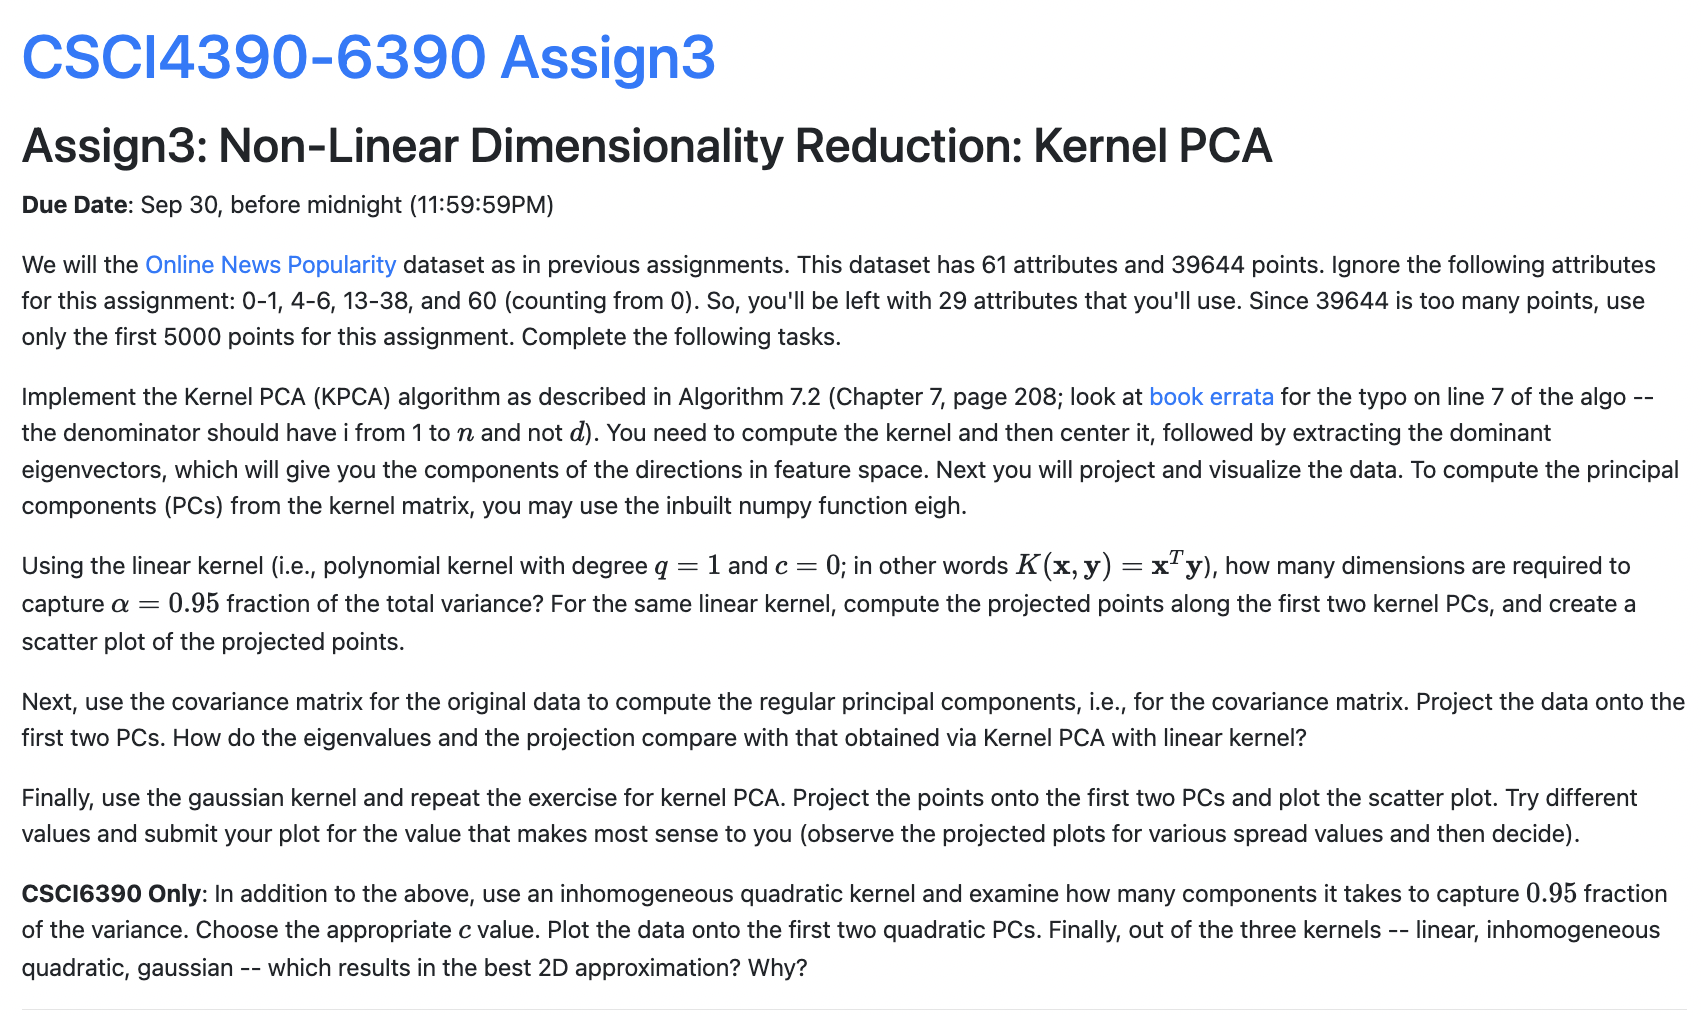

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading and Cleaning Data

In [88]:
df = pd.read_csv('OnlineNewsPopularity.csv')
print(df.columns)

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [89]:
c1 = df[df.columns[2:4]]
c2 = df[df.columns[7:13]]
c3 = df[df.columns[39:60]]
df = pd.concat([c1, c2, c3], axis=1)
df.head()

,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,LDA_00,LDA_01,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,4.0,2.0,1.0,0.0,4.680365,5.0,0.500331,0.378279,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,3.0,1.0,1.0,0.0,4.913725,4.0,0.799756,0.050047,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,3.0,1.0,1.0,0.0,4.393365,6.0,0.217792,0.033334,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,9.0,0.0,1.0,0.0,4.404896,7.0,0.028573,0.419300,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,19.0,19.0,20.0,0.0,4.682836,7.0,0.028633,0.028794,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [90]:
df = df.head(5000)
df.shape

(5000, 29)

## Setting variables

In [91]:
n = df.shape[0]
d = df.shape[1]
alpha = 0.95

## Linear Kernel

In [92]:
I=np.eye(5000) 
O=np.ones([n,n])/n
i_o = I-O
lk = np.dot(df,df.T) #step 1
k_br = np.dot(i_o,np.dot(lk,i_o)) #step 2
print(k_br)


[[  66960.97071963   57650.74971404   69027.59359944 ...   34330.4990171
    48064.9373983  -185826.62361056]
 [  57650.74971404   49649.69140655   59439.75878584 ...   29551.93376277
    41383.20271813 -159958.314801  ]
 [  69027.59359944   59439.75878584   71171.74359628 ...   35389.1439709
    49554.6622794  -191573.16910162]
 ...
 [  34330.4990171    29551.93376277   35389.1439709  ...   17667.79558324
    24651.92480261  -95348.19578332]
 [  48064.9373983    41383.20271813   49554.6622794  ...   24651.92480261
    34560.77086859 -133413.55888478]
 [-185826.62361056 -159958.314801   -191573.16910162 ...  -95348.19578332
  -133413.55888478  516065.81889657]]


## Algorithm 7.2 KPCA

In [93]:
l,u = np.linalg.eigh(k_br) #step3 & 4

In [94]:
l = l[::-1] #fliping eigen values array
u = np.flip(u, axis=1) #fliping eigen vectors array
li = l/n #step 5
print(li)

t_var = np.sum(li)

total = 0
for i in range(0,len(li)): #step 7 & 8
    if total>=alpha:
        vnum = i
        break
    else:
        total+=li[i]/t_var
print('vectors required for capturing 0.95 variance: ',vnum)

el = li[0:2]
print('eigen values: ', el)
eu = u[:,0:2]

ui = eu/np.sqrt(n*el) #step 6 & 9
projd = np.dot(k_br,ui) #step 10
        

[ 1.56219562e+05  8.10578793e+01  3.93806145e+01 ... -3.08953054e-11
 -6.84390203e-11 -1.42548366e-10]
vectors required for capturing 0.95 variance:  1
eigen values:  [1.56219562e+05 8.10578793e+01]


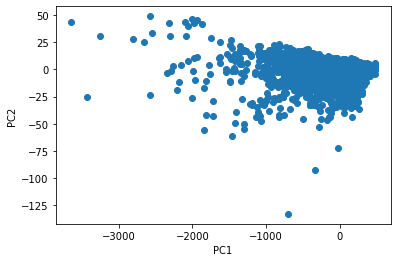

In [95]:
def plot_d(d):

    plt.scatter(d[:, 0], d[:, 1])
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()
    
plot_d(projd)

## PCA

In [96]:
df1 = df.to_numpy()
dmean = np.mean(df1, axis=0)
k1 = df1 - dmean
cov = np.dot(k1.T, k1)/n

In [97]:
l,u = np.linalg.eigh(cov) #step3 & 4

In [98]:
l = l[::-1] #fliping eigen values array
u = np.flip(u, axis=1) #fliping eigen vectors array
print(u.shape)

el = l[0:2]
print('eigen values: ', el)
eu = u[:,0:2]

projd = np.dot(k1,eu)


(29, 29)
eigen values:  [1.56219562e+05 8.10578793e+01]


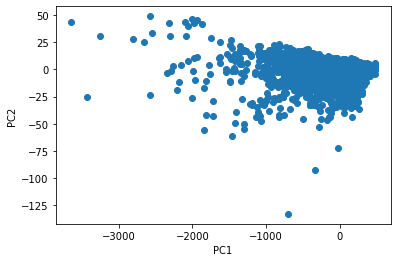

In [99]:
plot_d(projd)

## Inhomogeneous quadratic kernel

In [100]:
c = 20000
k = (c + lk)**2
k = np.dot(i_o,np.dot(k,i_o)) #step 2
print(k)

[[ 1.15945308e+11  1.09835513e+11  1.17190922e+11 ...  9.06915103e+10
   1.02626551e+11 -3.59463793e+11]
 [ 1.09835513e+11  1.04069825e+11  1.11011931e+11 ...  8.59743829e+10
   9.72578455e+10 -3.40582786e+11]
 [ 1.17190922e+11  1.11011931e+11  1.18452968e+11 ...  9.16497441e+10
   1.03720223e+11 -3.63303561e+11]
 ...
 [ 9.06915103e+10  8.59743829e+10  9.16497441e+10 ...  7.11593572e+10
   8.04012522e+10 -2.81484160e+11]
 [ 1.02626551e+11  9.72578455e+10  1.03720223e+11 ...  8.04012522e+10
   9.09278204e+10 -3.18344277e+11]
 [-3.59463793e+11 -3.40582786e+11 -3.63303561e+11 ... -2.81484160e+11
  -3.18344277e+11  1.11521038e+12]]


In [101]:
l,u = np.linalg.eigh(k) #step3 & 4

(5000, 5000)
vectors required for capturing 0.95 variance:  1
eigen values:  [7.25296074e+11 1.26752150e+09]


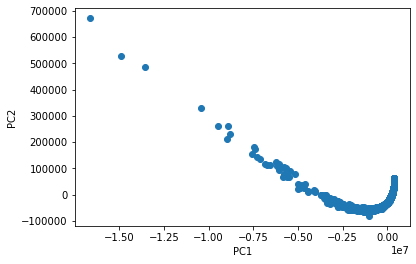

In [102]:
l = l[::-1] #fliping eigen values array
u = np.flip(u, axis=1) #fliping eigen vectors array
li = l/n #step 5
print(u.shape)

t_var = np.sum(li)

total = 0
for i in range(0,len(li)): #step 7 & 8
    if total>=alpha:
        vnum = i
        break
    else:
        total+=li[i]/t_var
print('vectors required for capturing 0.95 variance: ',vnum)

el = li[0:2]
print('eigen values: ', el)
eu = u[:,0:2]

ui = eu/np.sqrt(n*el) #step 6 & 9
projd = np.dot(k,ui) #step 10
plot_d(projd)

## Gausian kernel

In [113]:
s = np.linalg.norm(lk, axis = 0)
st = np.reshape(s, (1, n))
print(s.shape,st.shape)
spread = 50000


gk = (2 * lk  - s - st)/(2*spread)
gk = np.exp(gk)


k = np.dot(i_o, np.dot(gk, i_o))
print(k)


(5000,) (1, 5000)
[[ 3.24013586e-07  3.24013586e-07  3.24013586e-07 ...  3.24013586e-07
   3.24013586e-07  3.24013586e-07]
 [ 5.09927704e-06  5.09927704e-06  5.09927704e-06 ...  5.09927704e-06
   5.09927704e-06  5.09927704e-06]
 [ 2.85791151e-06  2.85791151e-06  2.85791151e-06 ...  2.85791151e-06
   2.85791151e-06  2.85791151e-06]
 ...
 [-3.56638345e-06 -3.56638345e-06 -3.56638345e-06 ... -3.56638345e-06
  -3.56638345e-06 -3.56638345e-06]
 [-2.25748625e-06 -2.25748625e-06 -2.25748625e-06 ... -2.25748625e-06
  -2.25748625e-06 -2.25748625e-06]
 [ 8.64787438e-06  8.64787438e-06  8.64787438e-06 ...  8.64787438e-06
   8.64787438e-06  8.64787438e-06]]


In [114]:
l,u = np.linalg.eigh(k) #step3 & 4

(5000, 5000)
vectors required for capturing 0.95 variance:  1
eigen values:  [3.65402962e-05 2.19824303e-05]


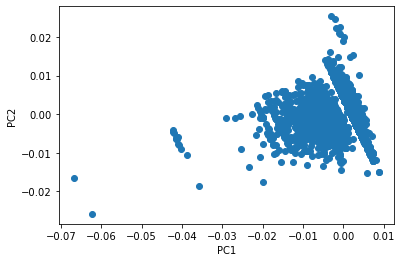

In [115]:
l = l[::-1] #fliping eigen values array
u = np.flip(u, axis=1) #fliping eigen vectors array
li = l/n #step 5
print(u.shape)

t_var = np.sum(li)

total = 0
for i in range(0,len(li)): #step 7 & 8
    if total>=alpha:
        vnum = i
        break
    else:
        total+=li[i]/t_var
print('vectors required for capturing 0.95 variance: ',vnum)

el = li[0:2]
print('eigen values: ', el)
eu = u[:,0:2]

ui = eu/np.sqrt(n*el) #step 6 & 9
projd = np.dot(k,ui) #step 10
plot_d(projd)

The best approximation to standard PCA is the linear kernel because the plot exactly matches the plot produced by the standard PCA